In [1]:
from skimage import data

In [2]:
coffee_image = data.coffee()
coins_image = data.coins()

In [3]:
coffee_image.shape

(400, 600, 3)

In [4]:
coins_image.shape

(303, 384)

## RGB to grayscale

In [5]:
import matplotlib.pyplot as plt

In [6]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

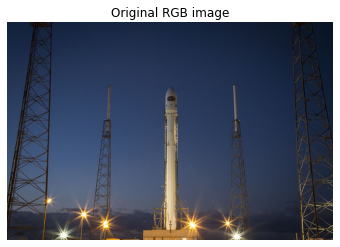

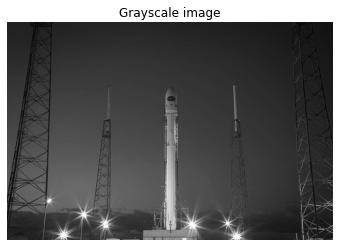

In [7]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

## Flipping out

In [8]:
from skimage import io
import numpy as np
flipped_seville = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/915096a8c431745a13227259e81103d90e038ec0/sevilleup(2).jpg')


In [9]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

In [10]:
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

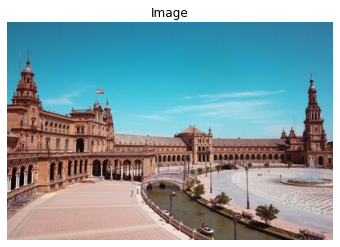

In [11]:
show_image(seville_vertical_flip)

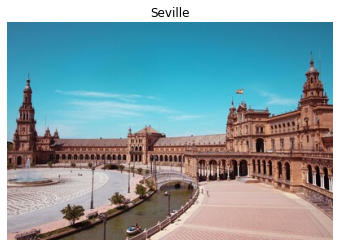

In [12]:
show_image(seville_horizontal_flip, 'Seville')

## Histograms

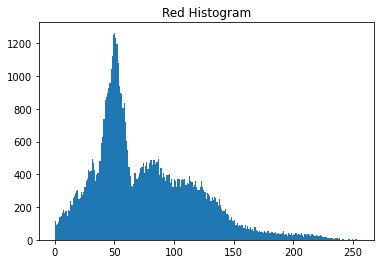

In [13]:
image = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/4ce875b1fceea382361da4fb4177ec2f16a8c016/4.1.01.jpg')
# Obtain the red channel
red_channel = image[:, : ,0 ]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

## Apply global thresholding

In [14]:
chess_pieces_image = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/a3e2534b613b0083fd4b39aedbcf6dea8fd13947/bw.jpg')

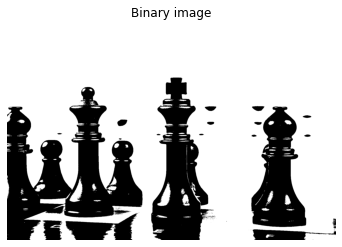

In [15]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu,threshold_local

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

## When the background isn't that obvious

Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using `threshold_otsu()`. However, if there's uneven background illumination, adaptive thresholding `threshold_local()` (a.k.a. local thresholding) may produce better results.

In [16]:
import pickle
with open('img/page_image.pickle','rb') as f:
    page_image = pickle.load(f)

In [17]:
page_image

array([[ 91,  94,  99, ..., 135, 135, 134],
       [ 99, 104, 104, ..., 141, 141, 139],
       [105, 109, 109, ..., 145, 142, 141],
       ...,
       [146, 146, 141, ..., 142, 142, 142],
       [144, 140, 141, ..., 146, 141, 136],
       [145, 136, 143, ..., 143, 134, 126]], dtype=uint8)

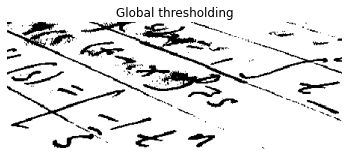

In [18]:
# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

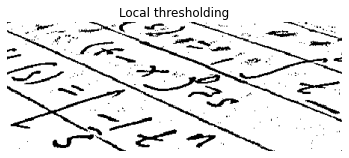

In [19]:
# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

## Trying other methods

In [20]:
fruits_image = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/1683f923022eadec156f155e80782274b95078ad/fruits-2.jpg')

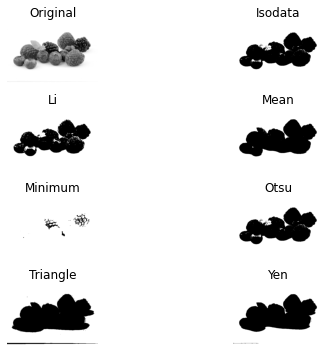

In [21]:
from skimage.filters import try_all_threshold
# Turn the fruits_image to grayscale
grayscale = color.rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

## Apply thresholding

In [22]:
tools_image = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/06b99c764a8d81145e33a9ac3ace8dade55fced2/shapes52.jpg')

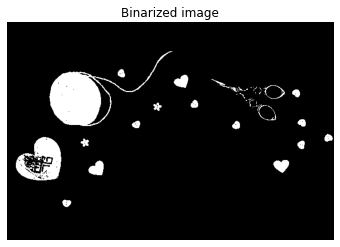

In [23]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

## Edge detection

In [24]:
soaps_image = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/e40f9d1aec6b6394f636d3e96e5bc46a123f2545/soaps.jpg')

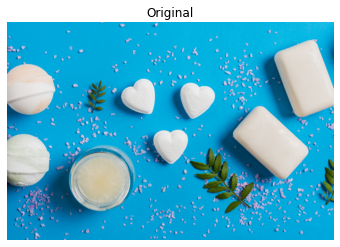

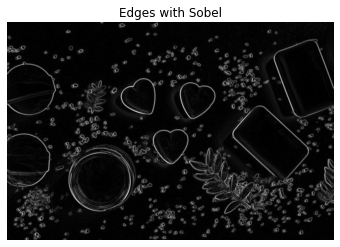

In [25]:


# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

## Blurring to reduce noise

In [26]:
building_image = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/0782692803666712f80e62b7ca83e803861b6ed6/toa-sharp-def-3.jpg')

/tmp/ipykernel_19303/2460152126.py:5: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_image = gaussian(building_image,multichannel=True)


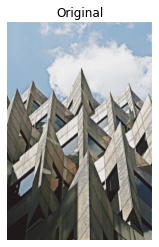

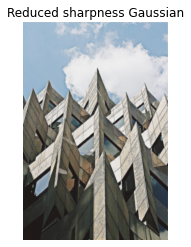

In [27]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image,multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

## Medical images

In [28]:
chest_xray_image = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/a0abe7fb876883411f306561c000e6cdecfe4e91/contrast_00000109_005.png')

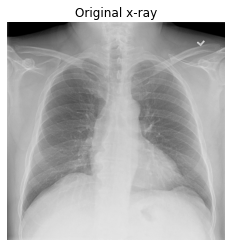

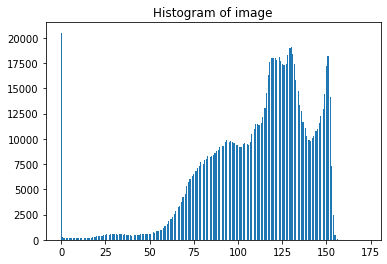

In [29]:
from skimage import exposure
# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

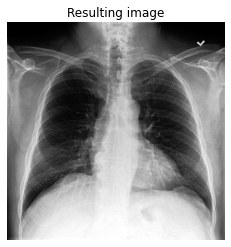

In [30]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)
# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

## Aerial image

In [31]:
image_aerial = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/bcdab87fe0975f4451869ead252972396da2d83b/5.2.09.png')

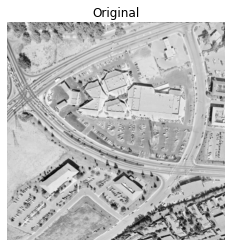

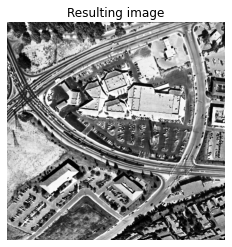

In [32]:
# Import the required module
from skimage.exposure import equalize_hist

# Use histogram equalization to improve the contrast
image_eq =  equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

## Let's add some impact and contrast

Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

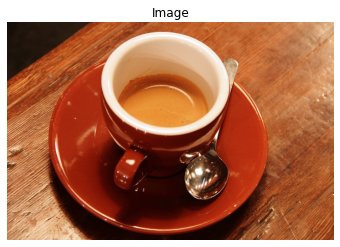

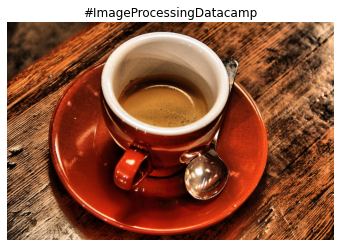

In [33]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

## Aliasing, rotating and rescaling
Let's look at the impact of aliasing on images.

Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.

You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.

In [34]:
image_cat = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/98ae7ee183329b00b10f2e0bcc4e25943e03aebd/kitty2.jpg')

/tmp/ipykernel_19303/2814750848.py:8: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)
/tmp/ipykernel_19303/2814750848.py:11: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)


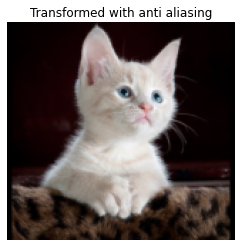

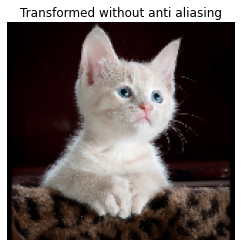

In [35]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

## Enlarging images

/tmp/ipykernel_19303/4179579883.py:11: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)


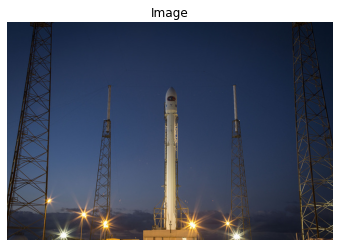

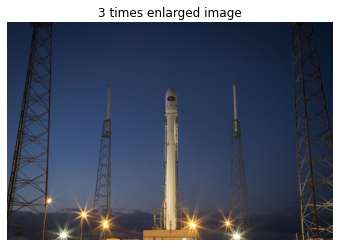

In [36]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")

## Proportionally resizing

We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

In [37]:
dogs_banner = io.imread('https://assets.datacamp.com/production/repositories/4470/datasets/736b12a3d210b0ac3f6bca28174cfd6522a0ad06/dogs4.jpg')